# Project Description

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make carprice valuation model. 

Phase 2 - Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like.

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_excel(r'C:\Users\HP-15\car_price_prediction.xlsx')
df

,Unnamed: 0,Brand,Model,Variant,Manufacturing_Year,Fuel,Transmission,Kms_driven,No._of_Owners,Price,City,State
0,0,Honda,BR-V,i-DTEC V MT,2016,Diesel,Manual,50000,1st,825000.0,Nashik,Maharashtra
1,1,Maruti Suzuki,Ertiga,SHVS ZDI Plus,2014,Diesel,Manual,88000,2nd,725000.0,Bengaluru,Karnataka
2,2,Maruti Suzuki,Alto,LXi,2011,Petrol,Manual,18124,-,184000.0,Gurgaon,Haryana
3,3,Maruti Suzuki,Swift Dzire,Vdi BSIV,2010,Diesel,Manual,68000,1st,339999.0,Mumbai,Maharashtra
4,4,Maruti Suzuki,S-Cross,Alpha 1.3,2018,Diesel,Manual,33000,2nd,899000.0,Navi Mumbai,Maharashtra
5,5,Hyundai,i20,1.2 Asta,2011,Petrol,Manual,46500,1st,345999.0,Mumbai,Maharashtra
6,6,-,-,-,-,-,-,-,-,NaN,NaN,NaN
7,7,Chevrolet,Spark,Others,2010,Petrol,Manual,56000,1st,135000.0,Delhi,Delhi
8,8,Ford,Figo,2010-2012 Diesel Titanium,2011,Diesel,Manual,78000,1st,260999.0,Mumbai,Maharashtra
9,9,BMW,5 Series,525d Luxury Line,2011,Diesel,Automatic,139000,1st,1175999.0,Mumbai,Maharashtra


In [3]:
# Dataset has extra columns- Removing them
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Brand,Model,Variant,Manufacturing_Year,Fuel,Transmission,Kms_driven,No._of_Owners,Price,City,State
0,Honda,BR-V,i-DTEC V MT,2016,Diesel,Manual,50000,1st,825000.0,Nashik,Maharashtra
1,Maruti Suzuki,Ertiga,SHVS ZDI Plus,2014,Diesel,Manual,88000,2nd,725000.0,Bengaluru,Karnataka
2,Maruti Suzuki,Alto,LXi,2011,Petrol,Manual,18124,-,184000.0,Gurgaon,Haryana
3,Maruti Suzuki,Swift Dzire,Vdi BSIV,2010,Diesel,Manual,68000,1st,339999.0,Mumbai,Maharashtra
4,Maruti Suzuki,S-Cross,Alpha 1.3,2018,Diesel,Manual,33000,2nd,899000.0,Navi Mumbai,Maharashtra



It is observed that variable 'Unnamed: 0' has been deleted from the dataframe. Since we can see '-' values in dataframe which are considered as NaN values, will be replaced with np.nan to identify NaN values within the dataframe.

In [4]:
#Replacig '-' values with NaN values
df= df.replace('-',np.nan)
df.head()

,Brand,Model,Variant,Manufacturing_Year,Fuel,Transmission,Kms_driven,No._of_Owners,Price,City,State
0,Honda,BR-V,i-DTEC V MT,2016,Diesel,Manual,50000,1st,825000.0,Nashik,Maharashtra
1,Maruti Suzuki,Ertiga,SHVS ZDI Plus,2014,Diesel,Manual,88000,2nd,725000.0,Bengaluru,Karnataka
2,Maruti Suzuki,Alto,LXi,2011,Petrol,Manual,18124,NaN,184000.0,Gurgaon,Haryana
3,Maruti Suzuki,Swift Dzire,Vdi BSIV,2010,Diesel,Manual,68000,1st,339999.0,Mumbai,Maharashtra
4,Maruti Suzuki,S-Cross,Alpha 1.3,2018,Diesel,Manual,33000,2nd,899000.0,Navi Mumbai,Maharashtra


It is clearly observed that '-' values are now identified as NaN values.



# Checking Null Values

In [5]:
#Checking Null values
df.isnull().sum()

Brand                 279
Model                 135
Variant               472
Manufacturing_Year    135
Fuel                  167
Transmission          224
Kms_driven            279
No._of_Owners         414
Price                 135
City                  136
State                 136
dtype: int64

NaN values are observed in every column of the data set.

In [6]:
#Filling the place column using simle Imputer 
#Filling integer values with median
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='median')

df['Kms_driven']=imp.fit_transform(df['Kms_driven'].values.reshape(-1,1))
df['Price']=imp.fit_transform(df['Price'].values.reshape(-1,1))

In [7]:
#Filling the place column using simle Imputer
#Filling object values with most_frequent

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

df['Brand']=imp.fit_transform(df['Brand'].values.reshape(-1,1))
df['Model']=imp.fit_transform(df['Model'].values.reshape(-1,1))
df['Variant']=imp.fit_transform(df['Variant'].values.reshape(-1,1))
df['Manufacturing_Year']=imp.fit_transform(df['Manufacturing_Year'].values.reshape(-1,1))
df['Fuel']=imp.fit_transform(df['Fuel'].values.reshape(-1,1))
df['Transmission']=imp.fit_transform(df['Transmission'].values.reshape(-1,1))
df['No._of_Owners']=imp.fit_transform(df['No._of_Owners'].values.reshape(-1,1))
df['City']=imp.fit_transform(df['City'].values.reshape(-1,1))
df['State']=imp.fit_transform(df['State'].values.reshape(-1,1))

All null values have been converted into some values using "median" and "most_frequent" strategies of the Simple Imputer function. Since the variable "Kms_driven" is still of the object data type, we will convert it into integer values.

In [8]:
#Converting object variables into integer type
df["Kms_driven"]=df["Kms_driven"].astype(int)

In [9]:
#Checking data types of variable 'Kms_driven' if converted
df.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing_Year     object
Fuel                   object
Transmission           object
Kms_driven              int32
No._of_Owners          object
Price                 float64
City                   object
State                  object
dtype: object

Variable "Kms_driven" has been converted to integer values.


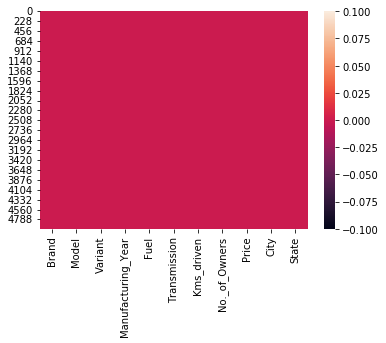

In [10]:
#Visualizing null values in the data set through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

As we cannot see any null values in our data. Hence, we proceed forward with Visualizing the data.



# Making DataFrame for the Nominal Data


In [11]:
#Copying nominal variables into a new dataframe
df_nominal=df[['Brand','Model','Variant','Manufacturing_Year','Fuel','Transmission','No._of_Owners','City','State']].copy()

In [12]:
#Checking columns of new nominal dataframe created
df_nominal.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Fuel',
       'Transmission', 'No._of_Owners', 'City', 'State'],
      dtype='object')

In [13]:
#Cheking shape of new nominal dataframe
df_nominal.shape

(5000, 9)

We have 9 columns in the nominal DataFrame.

# Visualization of Data

For the nominal/categorical data we will use countplot as it will gives frequency of the columns.

In [14]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

Maruti Suzuki       1862
Hyundai              753
Mahindra             412
Toyota               313
Tata                 312
Honda                246
Ford                 162
Volkswagen           135
Chevrolet            133
Renault               98
BMW                   75
Mercedes-Benz         68
Skoda                 68
Nissan                58
Audi                  55
Other Brands          54
Datsun                26
Fiat                  22
Land Rover            15
Mitsubishi            15
Force Motors          14
Volvo                 14
Jeep                  13
MG                    12
Kia                    9
Mini                   9
Bajaj                  8
Ashok Leyland          8
Jaguar                 6
Isuzu                  5
Ambassador             4
Daewoo                 3
Eicher Polaris         3
Opel                   2
Hindustan Motors       2
Dc                     2
Mahindra Renault       1
Lamborghini            1
Porsche                1
Hummer                 1


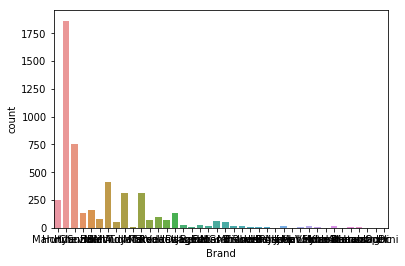

In [15]:
#Using countplot for nominal data
ab=sns.countplot(x='Brand', data=df_nominal)
print(df_nominal['Brand'].value_counts())

The maximum cars on sale are from the brands 'Maruti Suzuki', 'Hyundai' & 'Mahindra'. Very few are from high range brands like 'Lamborghini','Hummer','Porsche',etc.. This is what it shows from the data that we have collected.

In [16]:
#Displaying maximum columns for better understaning of data
pd.set_option('display.max_rows',None)

Swift                 377
Others                187
Swift Dzire           176
Wagon R               134
i20                   128
Alto                  125
Innova                122
i10                   113
City                   99
800                    99
Omni                   97
Scorpio                91
Ertiga                 84
Santro Xing            73
Verna                  72
Baleno                 70
Polo                   69
EON                    69
Grand i10              68
Bolero                 68
Alto 800               64
Zen                    61
Eeco                   60
Elite i20              55
Ritz                   54
Innova Crysta          54
Creta                  53
Ecosport               53
XUV500                 53
Alto K10               49
Amaze                  48
Etios                  47
Figo                   47
Vitara Brezza          47
KWID                   44
Vento                  42
Ciaz                   41
Fortuner               35
Santro      

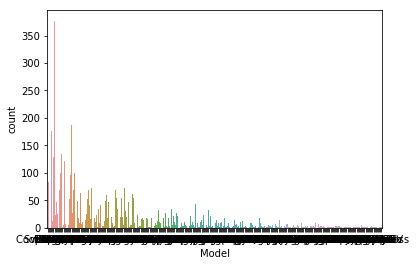

In [17]:
#Using countplot for nominal data
ab=sns.countplot(x='Model', data=df_nominal)
print(df_nominal['Model'].value_counts())

There are maximum cars from the models such as 'Swift','Swift Dzire','Wagon R'. Few models are unknown which is under the 'Others' category. The model categories are widely diverse in the data set obtained. For many of the car models, there is only one car available for a particular model. Cars vary with wide range of models.

Others                                             854
VXI                                                115
VDI                                                104
LXI                                                 92
AC                                                  51
LXi                                                 46
LX                                                  40
VDi                                                 30
ZDI                                                 30
Sportz                                              28
Era +                                               23
LDI                                                 21
2011-2014 VDI                                       20
Magna                                               20
GLS                                                 19
ZXI                                                 19
5 Seater AC                                         17
1.4 GD                                              16
VDI Option

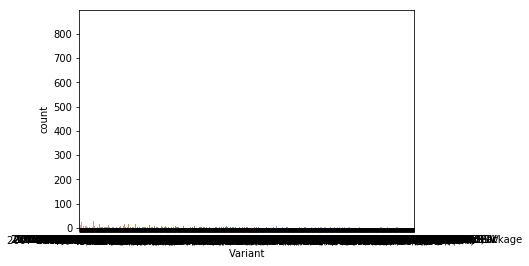

In [18]:
#Using countplot for nominal data
ab=sns.countplot(x='Variant', data=df_nominal)
print(df_nominal['Variant'].value_counts())

The car variant for most of the cars is not clearly defined and comes under the "Others" category which sows the maximum data. Also we have maximum cars from variants 'VXI','VDI','LXI'. The variants of the cars available on sale are more diverse and scattered than that of it's brand and models as the data set contains wide range of car brands, models & variants available for sale. From this observation, we can say that, the records that the data set holds has a large variety of cars available for sale with different features.

2016      595
2012      424
2017      408
2013      396
2015      359
2011      357
2014      353
2018      331
2010      306
2019      227
2009      207
2008      198
2007      170
2006      120
2020      106
2005       71
2004       64
2021       58
2003       53
2002       41
2001       34
2000       26
1998       21
1999       19
1997       12
1996        7
1995        7
1994        4
1991        3
1987        2
1989        2
1992        2
1986        2
2013.0      2
1983        1
2014.0      1
1970        1
1988        1
1972        1
1969        1
1990        1
2007.0      1
2018.0      1
1913        1
1985        1
1965        1
2019.0      1
Name: Manufacturing_Year, dtype: int64


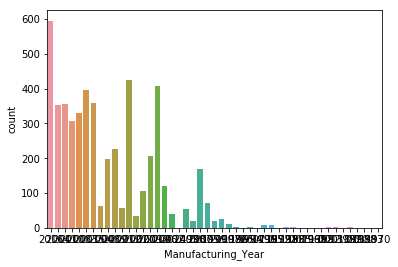

In [19]:
#Using countplot for nominal data
ab=sns.countplot(x='Manufacturing_Year', data=df_nominal)
print(df_nominal['Manufacturing_Year'].value_counts())

Most of the cars are from the Manufacturing Year '2016','2012' & '2017'. From this information, we can infer that most of the cars from the records are not too old to buy. On the contrary, there are few old cars which were manufactured in the years '1913','1965'&'1972' but are very few in number. Maximum cars from the records have manufacturing year as '2000 and above' and very few are too old.

Diesel           2730
Petrol           1976
CNG & Hybrids     200
LPG                84
Electric           10
Name: Fuel, dtype: int64


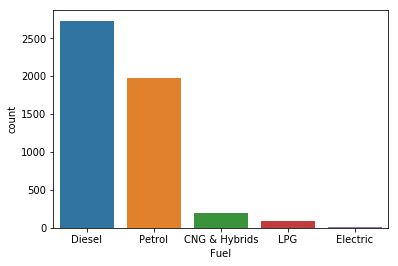

In [20]:
#Using countplot for nominal data
ab=sns.countplot(x='Fuel', data=df_nominal)
print(df_nominal['Fuel'].value_counts())


Maximum cars in the data set have "Diesel" cars which are 2730 in number, and second highest are 'Petrol' cars which are 1976. Least are 'Electric' car which are only 10 in the above data set.

Manual       4105
Automatic     895
Name: Transmission, dtype: int64


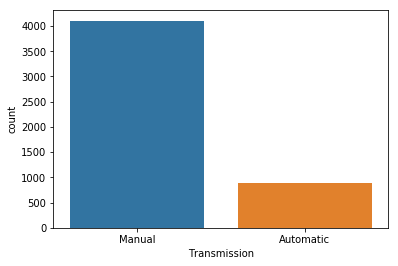

In [21]:
#Using countplot for nominal data
ab=sns.countplot(x='Transmission', data=df_nominal)
print(df_nominal['Transmission'].value_counts())

4105 cars in the above data set are "Manual" cars and only 895 are "Automatic" cars.

1st    2968
2nd    1420
3rd     430
4th     135
4+       47
Name: No._of_Owners, dtype: int64


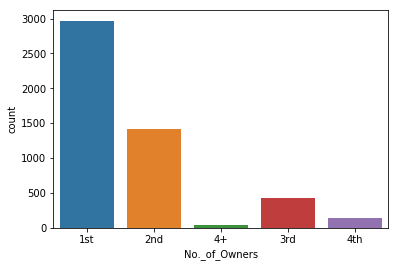

In [22]:
#Using countplot for nominal data
ab=sns.countplot(x='No._of_Owners', data=df_nominal)
print(df_nominal['No._of_Owners'].value_counts())

2968 cars were owned by only 1 person before sale, 1420 were owned by 2 people. Only 47 cars among 5000 are 4th hand cars.

 Bengaluru                                   484
 Mumbai                                      289
 Chennai                                     233
 Ahmedabad                                   228
 Jaipur                                      178
 Delhi                                       118
 Kochi                                       107
 Surat                                        99
 Lucknow                                      86
 Coimbatore                                   83
 Jalandhar                                    76
 Thane                                        75
 Pune                                         73
 Ludhiana                                     72
 Mohali                                       63
 Nashik                                       59
 Ghaziabad                                    51
 Thiruvananthapuram                           49
 Nagpur                                       49
 Vadodara                                     49
 Malappuram         

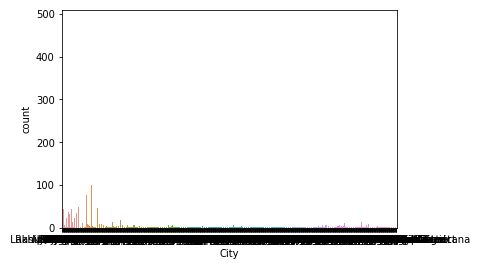

In [23]:
#Using countplot for nominal data
ab=sns.countplot(x='City', data=df_nominal)
print(df_nominal['City'].value_counts())

Maximum cars are in the cities 'Bengaluru','Mumbai' & 'Chennai'. From the above information, it is oberved that most of the cars are in the big cities and others are scattered diversely in a wide range of cities around the country.

 Maharashtra          795
 Kerala               588
 Karnataka            567
 Tamil Nadu           566
 Gujarat              551
 Uttar Pradesh        541
 Punjab               516
 Rajasthan            492
 Delhi                118
 Telangana             52
 India                 37
 Haryana               35
 West Bengal           29
 Madhya Pradesh        21
 Chhattisgarh          17
 Andhra Pradesh        15
 Chandigarh            11
 Assam                 11
 Uttaranchal           10
 Goa                    6
 Jammu & Kashmir        6
 Odisha                 5
 Bihar                  3
 Jharkhand              3
 Arunachal Pradesh      1
 Daman & Diu            1
 Rajgarh                1
 Pondicherry            1
 Tripura                1
Name: State, dtype: int64


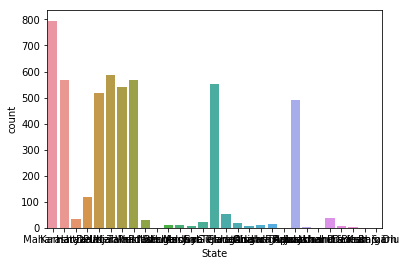

In [24]:
#Using countplot for nominal data
ab=sns.countplot(x='State', data=df_nominal)
print(df_nominal['State'].value_counts())

Most of the cars are from 'Maharashtra','Kerala' & 'Karnataka'.



# Making DataFrame of the Continuous type of Values

In [25]:
#Copying our continuous data into a new dataframe
df_continuous=df[['Kms_driven', 'Price']].copy()

In [26]:
#Verifying columns
df_continuous.columns

Index(['Kms_driven', 'Price'], dtype='object')

# Visualizing Continuous Data

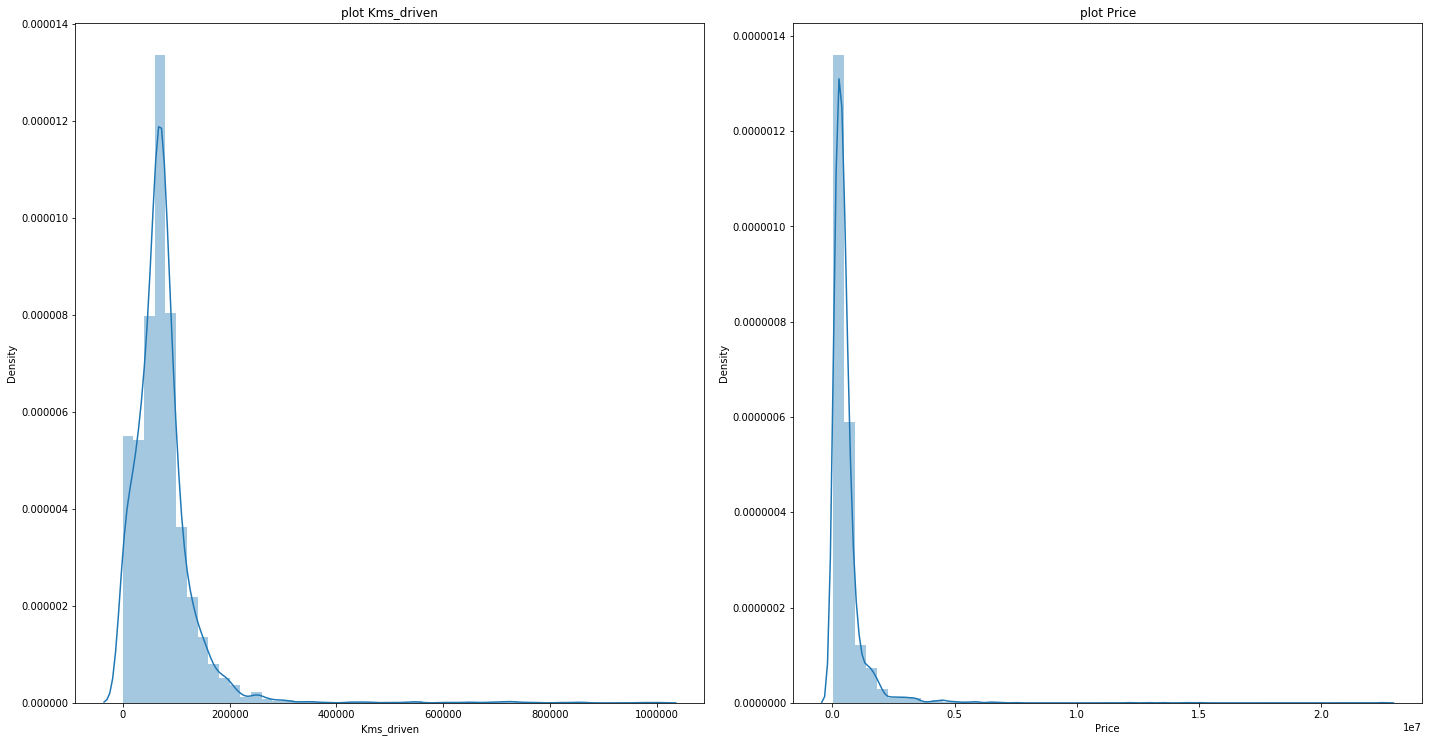

In [27]:
#Visualizing different columns using distplot
ncol,nrow=2,2
ab=df_continuous.columns.values
plt.figure(figsize=(20,20))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.distplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

From the above information, though exact numerical dispersion of values cannot be understood but all we can infer is that a lot of records belong to lower category of numbers and only a few are high valued be it the kms driven or the price of the car. Nothing else can be clearly inferred from the above graphs.

# Encoding of DataFrame

In [28]:
#Encoding data using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
#COnverting all string values into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
#Verifying encoded data
df.head()

,Brand,Model,Variant,Manufacturing_Year,Fuel,Transmission,Kms_driven,No._of_Owners,Price,City,State
0,14.0,37.0,1518.0,39.0,1.0,1.0,50000,0.0,825000.0,538.0,17.0
1,26.0,87.0,1281.0,36.0,1.0,1.0,88000,1.0,725000.0,108.0,14.0
2,26.0,20.0,1163.0,32.0,4.0,1.0,18124,0.0,184000.0,271.0,10.0
3,26.0,237.0,1422.0,31.0,1.0,1.0,68000,0.0,339999.0,513.0,17.0
4,26.0,211.0,885.0,41.0,1.0,1.0,33000,1.0,899000.0,541.0,17.0


We can see that our data has been encoded and all our string values have been assigned certain value and have been converted to floating values.



# Multivariate analysis of Complete Data

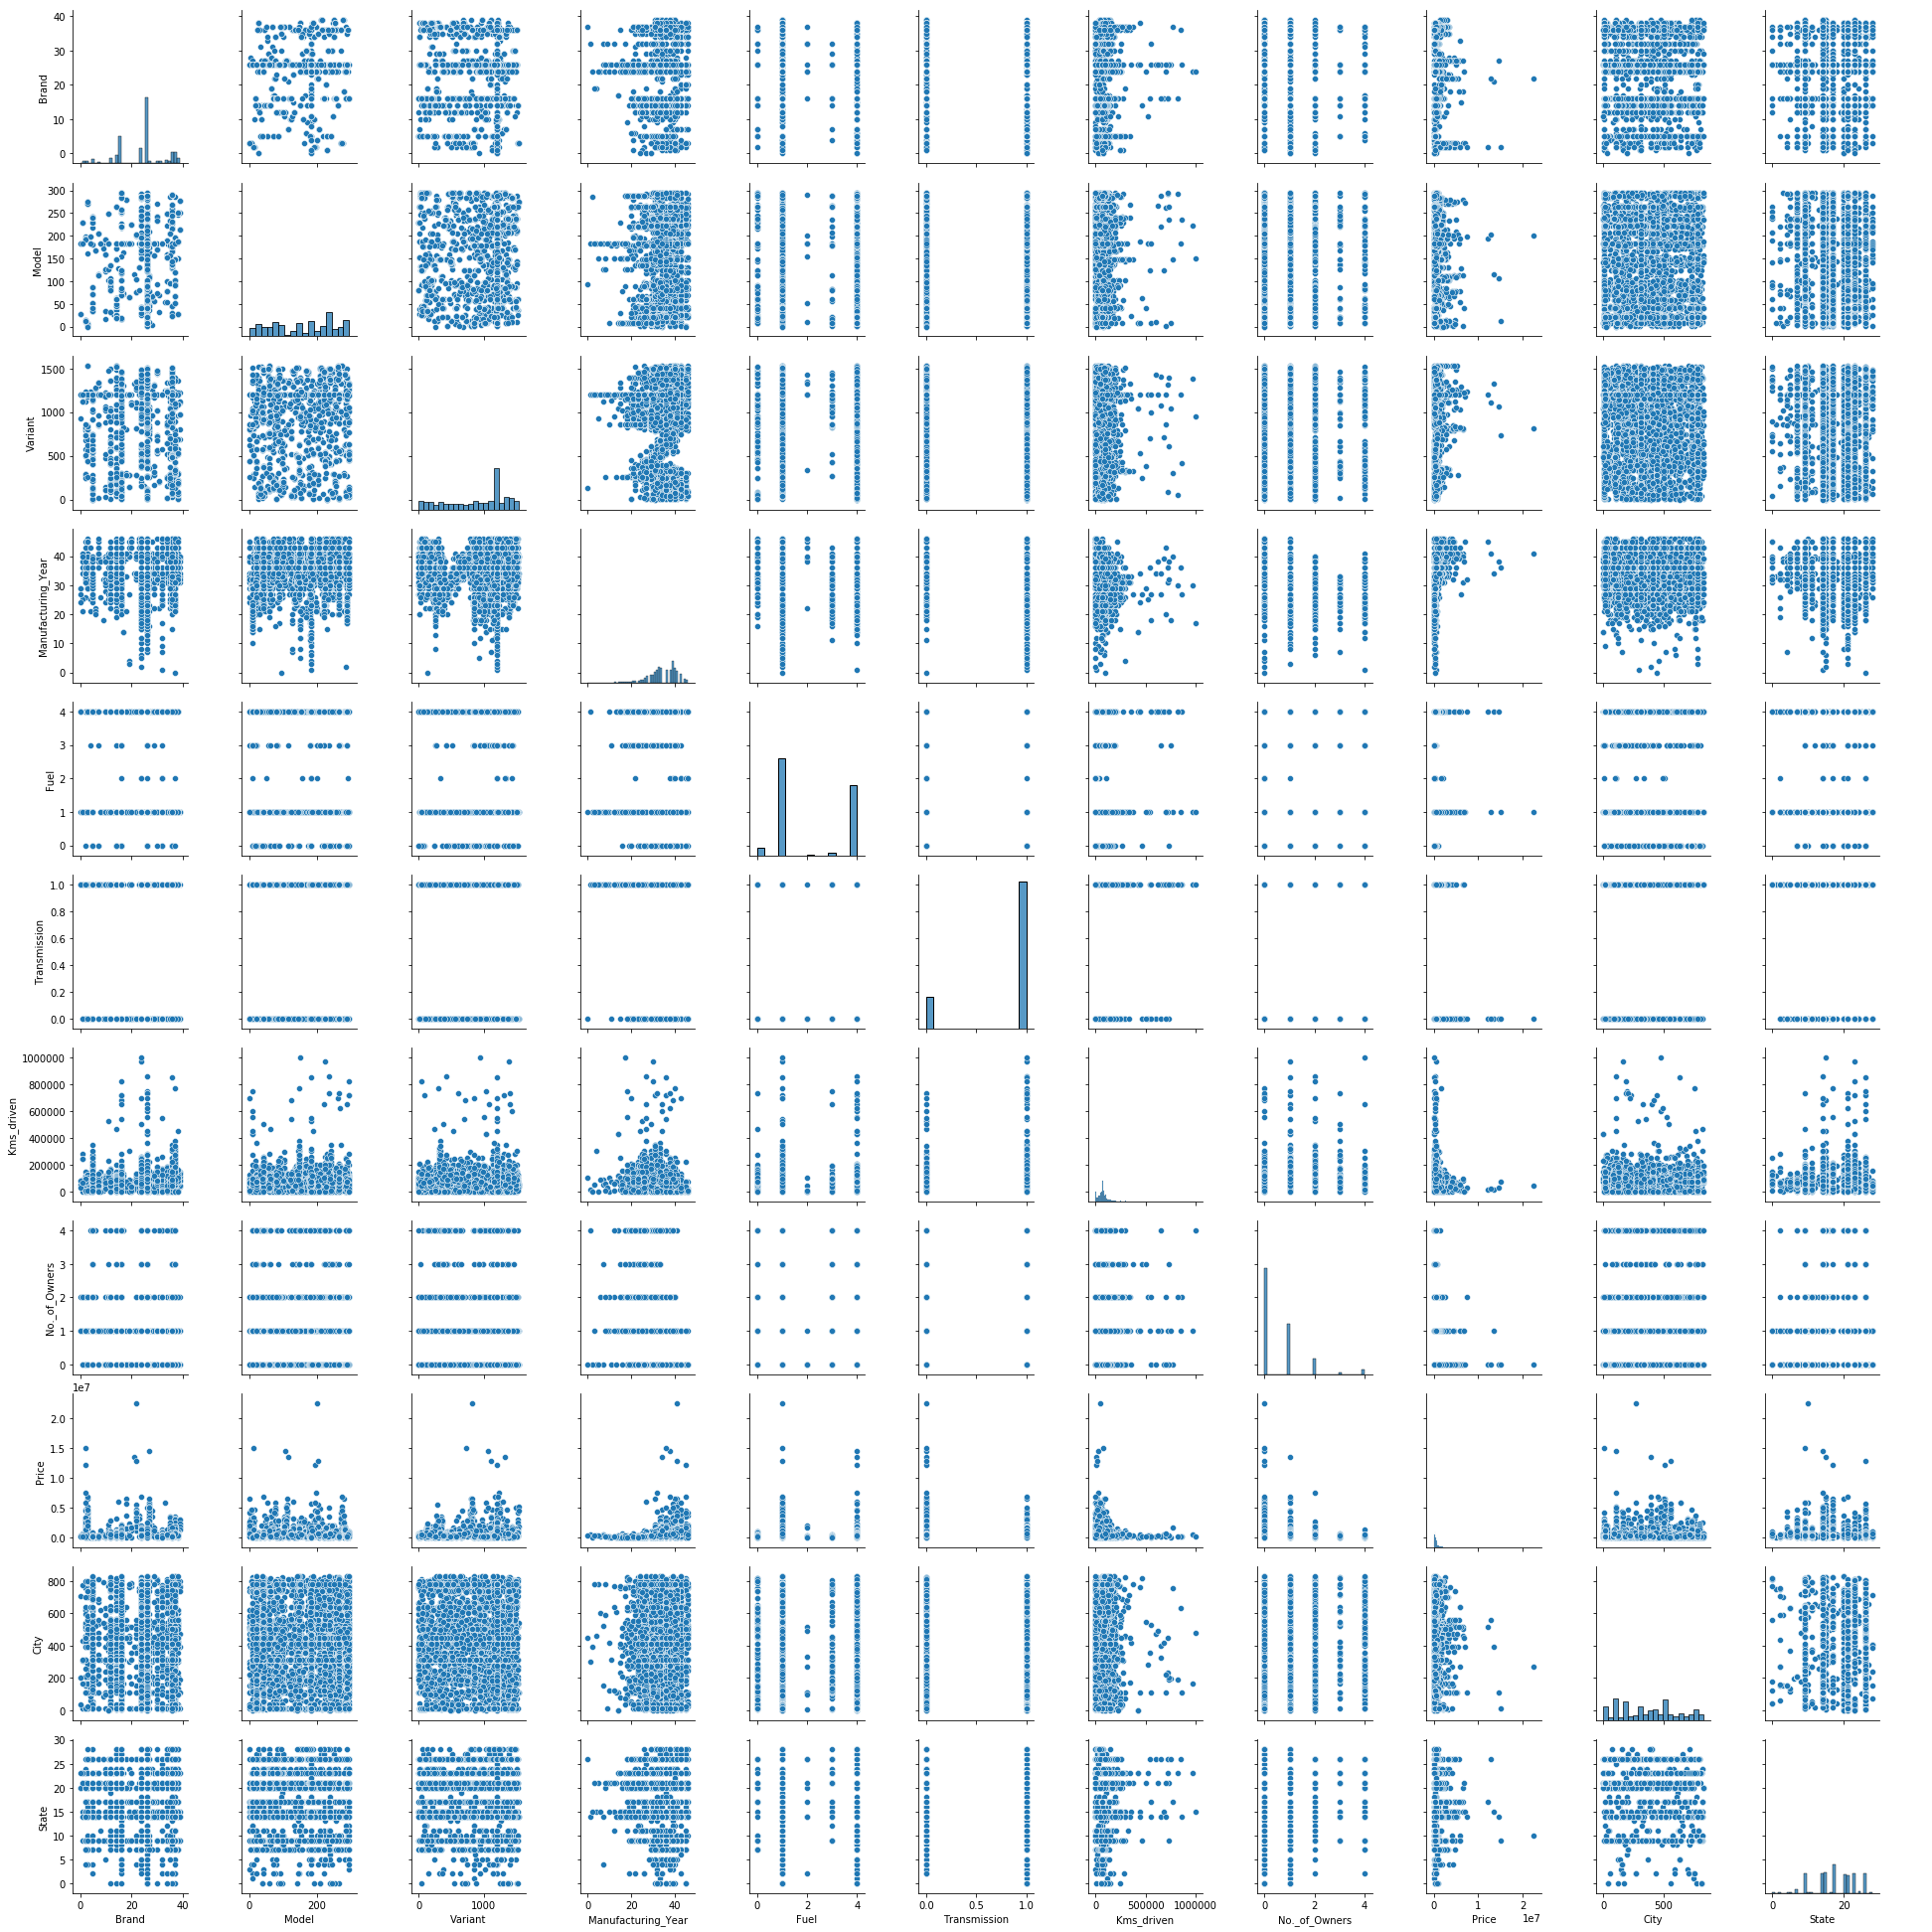

In [31]:
#using multivariate analysis

sns.pairplot(df)

As most of the data in our dataset is of the object datatype so we are unable to understand the data using this analysis. Data is scattered for few variables can be understood from the above figure. Hence, we'll try using other visualization techniques to understand data better.

# Describe Data

In [32]:
#Describing columns present in dataset
df.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Fuel',
       'Transmission', 'Kms_driven', 'No._of_Owners', 'Price', 'City',
       'State'],
      dtype='object')

In [33]:
#Defining Shape
df.shape

(5000, 11)

In [34]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Brand                 5000 non-null float64
Model                 5000 non-null float64
Variant               5000 non-null float64
Manufacturing_Year    5000 non-null float64
Fuel                  5000 non-null float64
Transmission          5000 non-null float64
Kms_driven            5000 non-null int32
No._of_Owners         5000 non-null float64
Price                 5000 non-null float64
City                  5000 non-null float64
State                 5000 non-null float64
dtypes: float64(10), int32(1)
memory usage: 410.2 KB


There are 5000 rows and no null values in our data. Also the values in the dataset are in the form of object,float and int. After the initial description of data, it is easier to understand our data better.

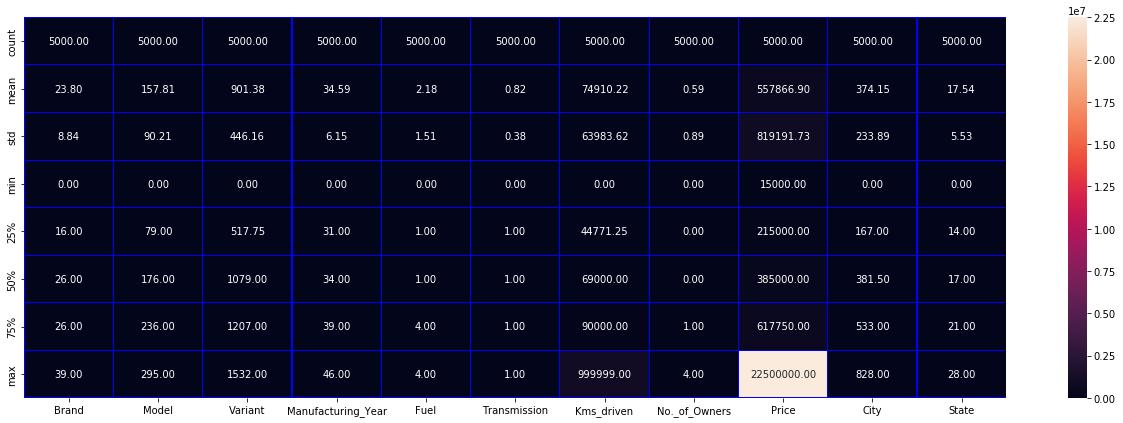

In [35]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

# Observation:
    
The standard deviation is high in most of the columns which means that the values in these columns are largely scattered and are far away from their mean values.

Standard deviation is the highest for variables "Kms_driven" & "Price".

The minimum value is 0 for all columns except the Price.

The maximum value is highest for variables "Kms_driven" & "Price".

The values of Price column which is the target variable starts from 15000 and ends at a rate 22500000. The range is too high for price.

# Correlation of Columns with the Target Variable

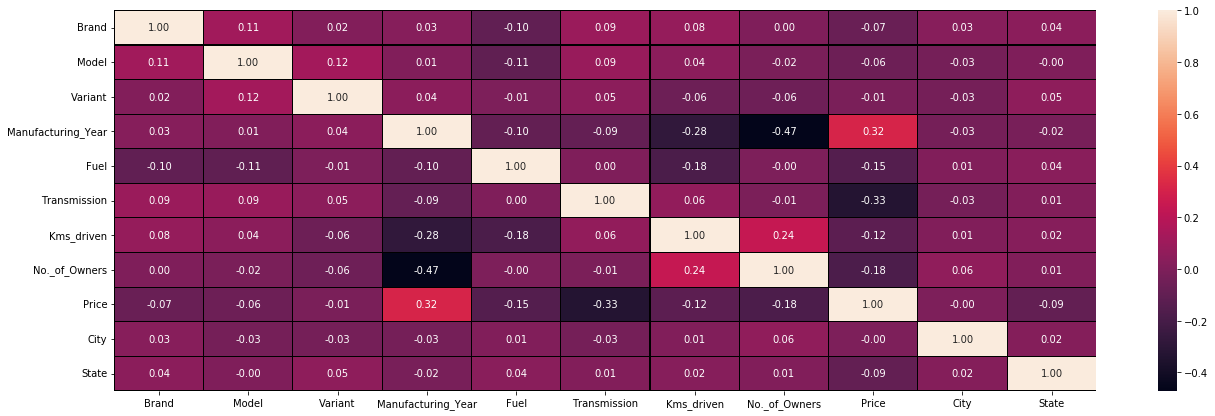

In [36]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:

We dont see any high positive correlation in our data with respect to the target variable.

The most negatively correlated column is that of the "Transmission".

The most positively correlated column is the "Manufacturing_Year".

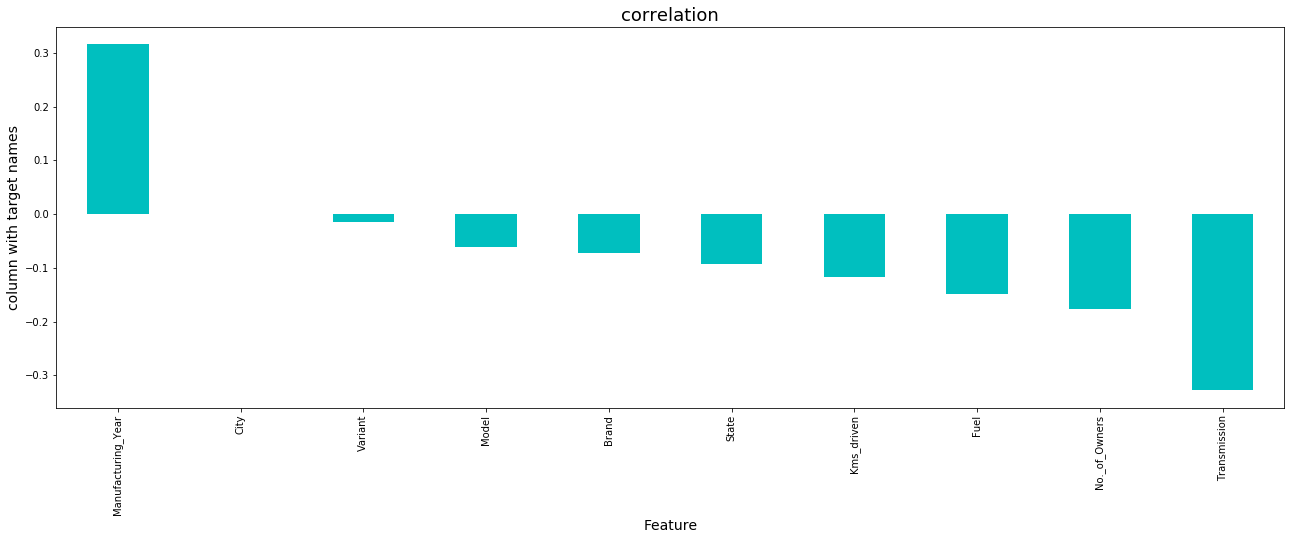

In [37]:
#Plotting Correlation in order with the target variable
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The only variable which is positively correlated to the target variable is "Manufacturing_Year". Rest all are negatively correlated.

The city column looks to have hardly any correlation with the target variable. We will confirm by getting numerical correlation of it with the target variable.

In [38]:
#Sorting correlation in order with the Target Variable
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                 1.000000
Manufacturing_Year    0.315554
City                 -0.000500
Variant              -0.014570
Model                -0.061364
Brand                -0.073365
State                -0.092223
Kms_driven           -0.117897
Fuel                 -0.148253
No._of_Owners        -0.176095
Transmission         -0.328080
Name: Price, dtype: float64

The correlation of variable "City" is almost 0 with the target variable. Hence, we drop the column since it does not serve much importance to our data set in predicting the price of cars.

In [39]:
# Dataset has unwanted column- Removing them
df.drop('City',axis=1,inplace=True)
df.head()

,Brand,Model,Variant,Manufacturing_Year,Fuel,Transmission,Kms_driven,No._of_Owners,Price,State
0,14.0,37.0,1518.0,39.0,1.0,1.0,50000,0.0,825000.0,17.0
1,26.0,87.0,1281.0,36.0,1.0,1.0,88000,1.0,725000.0,14.0
2,26.0,20.0,1163.0,32.0,4.0,1.0,18124,0.0,184000.0,10.0
3,26.0,237.0,1422.0,31.0,1.0,1.0,68000,0.0,339999.0,17.0
4,26.0,211.0,885.0,41.0,1.0,1.0,33000,1.0,899000.0,17.0


In [40]:
#Checking size of data set
df.shape

(5000, 10)

# Checking Skewness

In [41]:
#checking skewness
df.skew()

Brand                -0.420966
Model                -0.155845
Variant              -0.576953
Manufacturing_Year   -0.789997
Fuel                  0.313395
Transmission         -1.675202
Kms_driven            5.572456
No._of_Owners         1.888786
Price                 9.975706
State                -0.287278
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we do not see much skewness in our data. Columns 'Transmission', 'Kms_driven', 'No._of_Owners' and 'Price' show some skewness wherein all the input features are of the Object datatype and Price is the Target Variable. Hence, there is no skewness found in our data.

# Checking Outliers

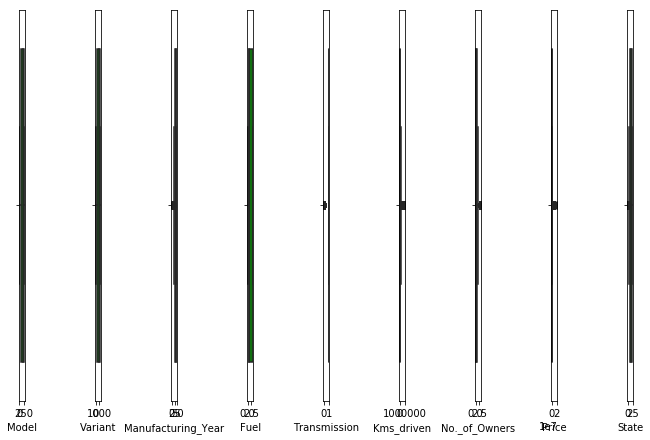

In [73]:
#Visualizing outliers of different variables
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Though we can see outliers present in data from the above box plot, it is not taken into consideration since all the input features are of the Object datatype and Price is the Target Variable. Therefore, there are no outliers present in data set.

# Separating the column into x & y

In [43]:
#Creating x & y columns 
x=df.drop('Price',axis=1)
y=df['Price']

Separating the columns into x & y as input featues and target variable respectively.

# Scaling Data Using Standard Scaler

In [44]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[-1.10831952, -1.33933568,  1.3821936 , ..., -0.66463886,
         0.32612612, -0.09765787],
       [ 0.24900032, -0.78501068,  0.85094226, ...,  0.45768276,
         0.20404236, -0.64040262],
       [ 0.24900032, -1.52780619,  0.58643737, ..., -0.66463886,
        -0.45643074, -1.36406229],
       ...,
       [ 0.02278035,  0.72275333, -1.1597432 , ...,  2.70232599,
        -0.26598009,  0.6260018 ],
       [ 0.02278035, -1.29498968,  0.71196511, ...,  0.45768276,
         7.6206304 ,  0.6260018 ],
       [ 0.24900032,  0.87796433,  1.06164954, ...,  0.45768276,
         0.06364605,  0.6260018 ]])

# Model Building

In [46]:
#Importing libraries to build model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [47]:
#Finding Max accuracy at the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)

Best accuracy is  1.0  on Random_state 1


Best accuracy is  1.0  on Random_state 1

We are getting 100% accuracy on random state 1. Hence, we select random state as 1

In [48]:
#Splitting data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=1)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 1. We will use linear Regression to train our model as we have a continuous tye of Target Variable.

In [49]:
#Code for Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

#displaying predicted and actual values
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y_test)

Predicted Happiness Score:  [ 65000. 611000. 180000. ... 385000. 585000.  95000.]
actual Happiness Score:  2764       65000.0
4767      611000.0
3814      180000.0
3499      495000.0
2735      250000.0
3922      511000.0
2701      594000.0
1179      182000.0
932       185000.0
792       340000.0
1852       95000.0
1185      950000.0
1724      265000.0
4080     1225000.0
3823      199999.0
4054      135000.0
2721     4675000.0
3903      290000.0
1865      825000.0
759       300000.0
2416     2000000.0
3670      311000.0
4838       70000.0
3090     1085000.0
1546      600000.0
1132      650000.0
4703      130000.0
4494      275000.0
2775      550000.0
3185     2200000.0
1213      650000.0
3289      685000.0
763       350000.0
1216       40000.0
348       345000.0
2982      280000.0
2916      820000.0
2971      300000.0
1355      350000.0
2330       60000.0
1513      280000.0
2181      575000.0
3347      495000.0
1660      345000.0
4377       55000.0
804       449000.0
1441     1750000.0


Let's check the Training accuracy and see how well we have trained our model.



In [50]:
#training score
lm.score(x_train,y_train)

1.0

We are obtaining 100% training accuracy for our Model. Let's try finding errors.

In [51]:
#Finding Errors -> an estimation of how well the model is performing
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 6.308122961358591e-10
Mean squared error: 6.73317270191772e-19
Root Mean squared error: 8.205591204732125e-10


We can observe the error rate for our predicted model to be less. Let's check the r2 score to check the performance of our model.



In [52]:
#Checking r2 Score for the model
print(r2_score(y_test,pred))

1.0


We are obtaining our r2 score as 100% which can also be due to overfitting or underfitting problems. Hence, we will use Cross Validation to train the model better.m

# Cross Validation of The Model

In [53]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 3 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 4 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 5 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 6 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 7 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 8 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 9 the cv score is 1.0 and r2 score for training is 1.0 and accuracy for the testing is 1.0




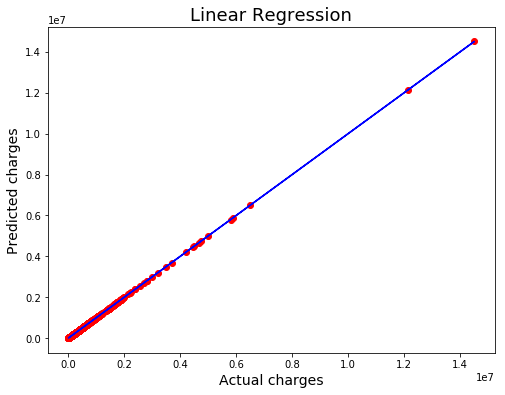

In [54]:
#Code for checking linear Regression points with target variale
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The Best Fit line is covering almost all the datapoints which shows good fit of our model.

Now, we will try to use different testing techniques and compare them to achieve the best performance for the model and also deal with it's over fitting and under fitting problems and then save the best model with high performance. We are going to use hyper parameter tuning for doing so.

# Regularization

Using ElasticNet Regression

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Using ElasticNet Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import ElasticNet

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'selection':['cyclic','random']}
en=ElasticNet()
clf=GridSearchCV(en,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0, 'selection': 'cyclic'}


In [57]:
#Code for ElasticNet Regression
en=ElasticNet(alpha=1,random_state=3,selection='random')
en.fit(x_train,y_train)
en.score(x_train,y_train)
pred_en=en.predict(x_test)

enn=r2_score(y_test,pred_en)
enn

0.8887896084352058

The r2 score for ElasticNet Regression is 88.87%.

#  Using Ridge Regression


In [58]:
#Using Ridge Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import Ridge

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'solver':['auto','svd','cholesky']}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0, 'solver': 'auto'}


In [59]:
#Code for Ridge Regression
rd=Ridge(alpha=0.0001,random_state=0,solver='auto')
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
rdd*100

99.99999999999991

The r2 score for Ridge Regression is 99.99%



# Using Lasso Regression

In [60]:
#Using Lasso Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'selection':['cyclic','random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0, 'selection': 'cyclic'}


In [61]:
#Code for Lasso Regression
ls=Lasso(alpha=0.0001,random_state=2,selection='random')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss*100

99.99999936792378

The r2 score for Lasso Regression is also 99.99%.

Hence, comparing all the three regularization techniques for regression i.e. ElasticNet, Ridge and Lasso, the model performs best for Lasso Regularization Regression technique at r2 score 100% accuracy.

# Ensemble Techniques

AdaBoostRegressor

In [62]:
#Finding best Parameters for Ada Boost Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameters={'random_state':list(range(0,10)),'loss':['linear','square','exponential']}
ab=AdaBoostRegressor()
clf=GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'loss': 'exponential', 'random_state': 5}


In [63]:
#Code for Ada Boost Regressor
ab=AdaBoostRegressor(random_state=4, n_estimators=100, loss='exponential')
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_y=ab.predict(x_test)

abs=r2_score(y_test,pred_y)
print('R2 score: ',abs*100)

R2 score:  95.8703197495599


In [64]:
#Finding the Cv score of the model
abscore=cross_val_score(ab,x,y,cv=2)
abc=abscore.mean()
print("Cross Val Score: ",abc*100)

Cross Val Score:  95.95584840761255


The r2 score for Ada Boost Regressor is 95.87% and that for it's cv score is 95.95%.

We will try using Random Forest Regressor algorithm to see if the score increases.

# RandomForestRegressor

In [65]:
#Finding best Parameters for RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'random_state':list(range(0,10)),'criterion':['mse','mae']}
rfg=RandomForestRegressor()
clf=GridSearchCV(rfg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'random_state': 0}


In [66]:
#Code for RandomForestRegressor
rfg=RandomForestRegressor(random_state=7, n_estimators=100, criterion='mse')
rfg.fit(x_train,y_train)
rfg.score(x_train,y_train)
pred_y=rfg.predict(x_test)

abs=r2_score(y_test,pred_y)
print('R2 score: ',abs*100)

R2 score:  99.14072691176209


In [67]:
#Finding the Cv score of the model
abscore1=cross_val_score(rfg,x,y,cv=9)
abc1=abscore1.mean()
print("Cross Val Score: ",abc1*100)

Cross Val Score:  98.29437668424052


The r2 score for RandomForestRegressor is 99.14% and it's cv score is 98.29%.

# GradientBoostingRegressor

In [68]:
#Finding best Parameters for Ensemble Techniques
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters={'criterion':['friedman_mse','mse','mae'],'max_features':['auto','sqrt','log2']}
gb=GradientBoostingRegressor()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [72]:
#Code for Gradient Boosting Regressor
gb=GradientBoostingRegressor(criterion='mae',max_features='auto')
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
pred_y=gb.predict(x_test)

gbs=r2_score(y_test,pred_y)
print('R2 score: ',gbs*100)

R2 score:  99.90146365952654


In [70]:
gbscore=cross_val_score(gb,x,y,cv=5)
gbc=gbscore.mean()
print("Cross Val Score: ",gbc*100)

Cross Val Score:  98.6488209068046


The r2 score after using Gradient Boosting Regressor is 99.92% which is the best algorithm among the ensemble techniques.

The CV score after using Gradient Boosting Regressor is 98.65%

# Conclusion

After comparing all the algorithms and hypertuning each of them, we select Lasso Regularization Regression as our best model for this data set. The r2 score for Lasso Regression is 100%.

# Saving The Best Model

In [71]:
#Saving the best model
import pickle
filename='car_price_prediction.pkl'
pickle.dump(ls,open(filename,'wb'))